Se cunosc date despre angajatii unei companii, date salvate in fisierul "data/employees.csv".

1.
    a. Sa se stabileasca:

        ‣ numarul de angajati
        ‣ numar si tipul informatiilor (proprietatilor) detinute pentru un angajat
        ‣ numarul de angajati pentru care se detin date complete
        ‣ valorile minime, maxime, medii pentru fiecare proprietate
        ‣ in cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate
        ‣ daca sunt valori lipsa si cum se poate rezolva aceasta problema
        
    b. Sa se vizualizeze:

        ‣ distributia salariilor acestor angajati pe categorii de salar
        ‣ distributia salariilor acestor angajati pe categorii de salar si echipa din care fac parte
        ‣ angajatii care pot fi considerati "outlieri"
        

Display datas

In [10]:
import pandas as pd

df_employees = pd.read_csv('data/employees.csv',delimiter=',', header='infer')

df_employees

/tmp/ipykernel_52704/1895150404.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


Numarul de Angajat:

In [14]:
print('Numarul angajatilor: {}'.format(len(df_employees)))

Numarul angajatilor: 1000


Numarul si tipul proprietatilor detinute de un angajat:

In [17]:
for column in df_employees.head():
    print('Numele proprietatii: {}\nTipul proprietatii: {}\n'.format(column, df_employees[column].dtype))

Numele proprietatii: First Name
Tipul proprietatii: object

Numele proprietatii: Gender
Tipul proprietatii: object

Numele proprietatii: Start Date
Tipul proprietatii: object

Numele proprietatii: Last Login Time
Tipul proprietatii: object

Numele proprietatii: Salary
Tipul proprietatii: int64

Numele proprietatii: Bonus %
Tipul proprietatii: float64

Numele proprietatii: Senior Management
Tipul proprietatii: object

Numele proprietatii: Team
Tipul proprietatii: object



Numarul de angajati pentru care se detin date complete:

In [6]:
df_filtered_employees = df_employees.dropna()
print('Numarul de angajati pentru care se detin date complete: {}'.format(len(df_filtered_employees)))

Numarul de angajati pentru care se detin date complete: 764


Valorile minime, maxime, medii pentru fiecare proprietate:

In [10]:
for column_name in df_filtered_employees.head():
    column = df_filtered_employees[column_name]
    if column.dtype != object:
        print("Column: {}\nMin value: {}\nMax value: {}\nMean value: {:.2f}\n".format(column_name, column.min(), column.max(), column.mean()))

Column: Salary
Min value: 35013
Max value: 149908
Mean value: 90433.20

Column: Bonus %
Min value: 1.015
Max value: 19.944
Mean value: 10.15



SAU

In [16]:
import numpy as np

for column_name in df_filtered_employees.select_dtypes(include=np.number):
    column = df_filtered_employees[column_name]
    print("Column: {}\nMin value: {}\nMax value: {}\nMean value: {:.2f}\n".format(column_name, column.min(), column.max(), column.mean()))

Column: Salary
Min value: 35013
Max value: 149908
Mean value: 90433.20

Column: Bonus %
Min value: 1.015
Max value: 19.944
Mean value: 10.15



SAU

In [28]:
print('Mean:\n{}\n'.format(df_filtered_employees.mean(numeric_only=True)))
print('Max:\n{}\n'.format(df_filtered_employees.max(numeric_only=True)))
print('Min:\n{}\n'.format(df_filtered_employees.min(numeric_only=True)))

Mean:
Salary     90433.196335
Bonus %       10.148041
dtype: float64

Max:
Salary     149908.000
Bonus %        19.944
dtype: float64

Min:
Salary     35013.000
Bonus %        1.015
dtype: float64



In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietati:

In [22]:
for column_name in df_filtered_employees.head():
    column = df_filtered_employees[column_name]
    if column.dtype == object:
        print('Coloana: {}\nNumar de valori distincte: {}\n'.format(column_name, column.nunique()))

Coloana: First Name
Numar de valori distincte: 199

Coloana: Gender
Numar de valori distincte: 2

Coloana: Start Date
Numar de valori distincte: 748

Coloana: Last Login Time
Numar de valori distincte: 604

Coloana: Senior Management
Numar de valori distincte: 2

Coloana: Team
Numar de valori distincte: 10



Daca sunt valori lipsa, cum se poate rezolva problema

Replace nan values with column.mode()

B. Sa se vizualizeze

Distributia salariilor acestor angajati per categorii de salarii

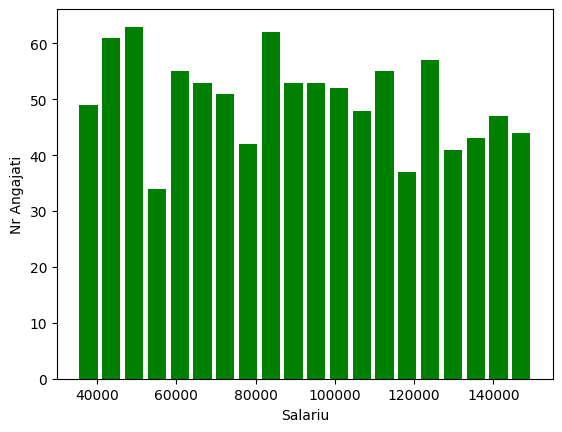

In [21]:
import matplotlib.pyplot as plt

plt.hist(df_employees['Salary'], 20, rwidth=0.8,color='green')
plt.xlabel('Salariu')
plt.ylabel('Nr Angajati')
plt.show()


Distributia salariilor acestor angajati p categorii de salar si echipa din care fac parte

Angajatii care pot fi considerati "outlieri"

In [57]:
q1= df_filtered_employees['Salary'].quantile(0.01)
q2= df_filtered_employees['Salary'].quantile(0.99)

df_filtered_employees[df_filtered_employees.Salary.between(q1,q2)]


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


Se dau mai multe imagini (salvate in folder-ul "data/images"). Se cere:

    sa se vizualizeze una din imagini
    daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.
    sa se transforme imaginile in format gray-levels si sa se vizualizeze
    sa se blureze o imagine si sa se afiseze in format "before-after"
    sa se identifice muchiile ontr-o imagine si sa se afiseze in format "before-after"

Sa se vizualizeze una din imagini

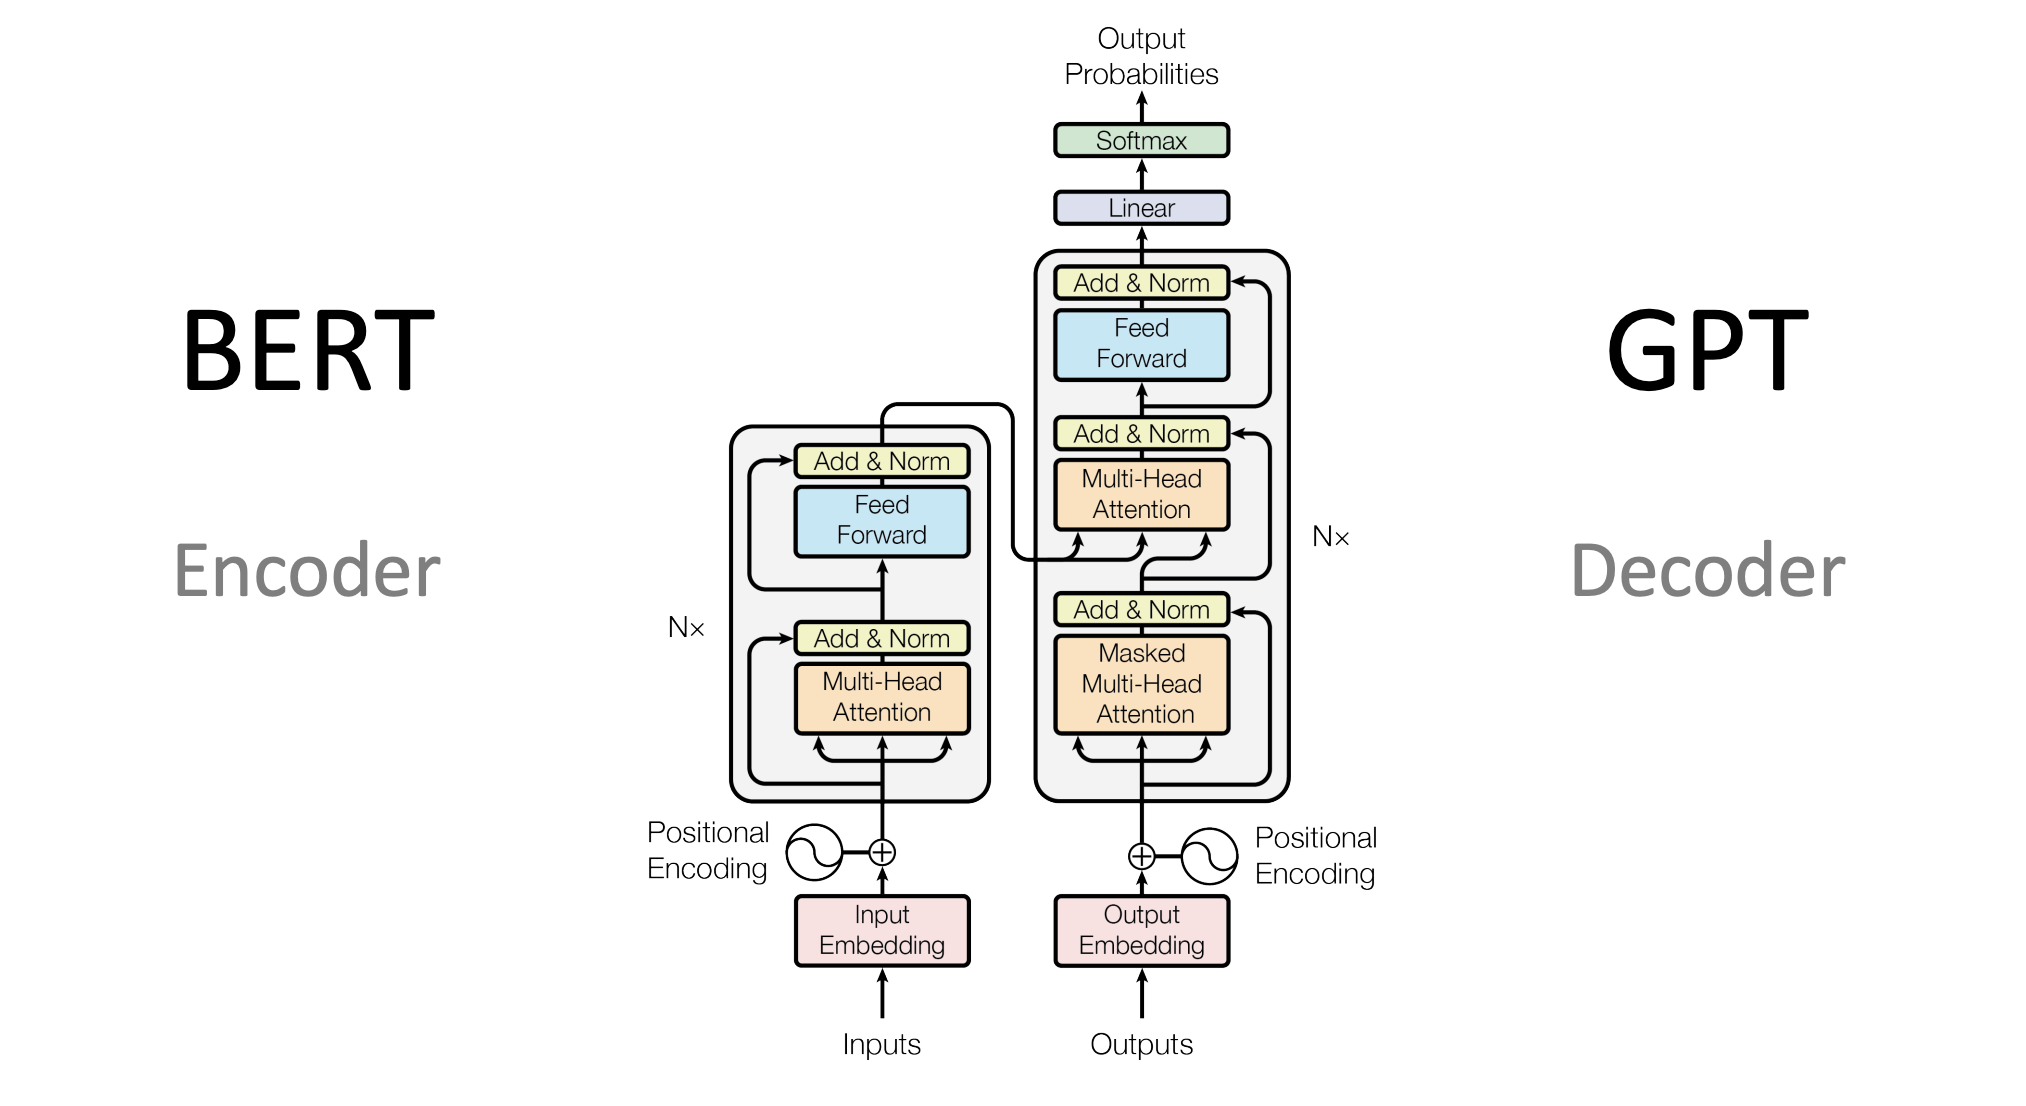

In [1]:
from PIL import Image
import glob, os

with Image.open("data/images/BERT.png") as im:
    im.show()

Daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar

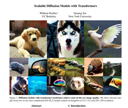

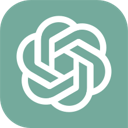

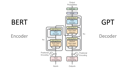

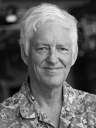

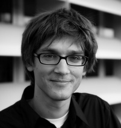

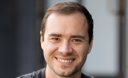

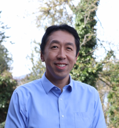

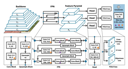

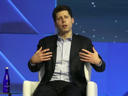

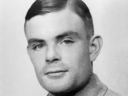

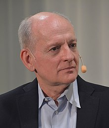

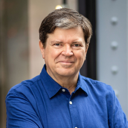

In [43]:
size = 128, 128

imgs = []

for infile in glob.glob("data/images/*"):
    if infile.endswith(".png") or infile.endswith(".jpg") or infile.endswith(".webp"):
        file, ext = os.path.splitext(infile)
        with Image.open(infile) as im:
            im.thumbnail(size)
            imgs.append(im)
    


